# Analystical

In [1]:
from sympy import *

In [2]:
def get_func(a,b):
    m = (b[1]-a[1]) / (b[0]-a[0])
    b = a[1] - m * a[0]
    return simplify(m * x + b)

In [3]:
def get_possible_zeros(sec, signs):
    sec_funcs = [get_func(sec[i],sec[i+1]) for i in range(len(sec)-1) if signs[i] != signs[i+1]]
    #print(sec_funcs)

    possible_zeros = [list(solveset(Eq(f,0), x))[0] for f in sec_funcs]
    return possible_zeros

In [4]:
def gen_new_sec(last_y, stops,signs):
    sec = [[0,last_y]]
    if len(stops)-1 != len(signs):
        print('Wrong number of signs for number of stops')
    for fx,tx,sign in zip(stops[:-1],stops[1:],signs):
        dx = tx-fx
        x_c = sec[-1][0] + dx
        dy = sign*dx
        y_c = sec[-1][1] + dy
        sec.append([x_c,y_c])
    return sec

In [5]:
y0 = symbols('y_0')
x = symbols('x')
inital_sec = [[0,y0-1],[1,y0]]

In [6]:
possible_zeros = get_possible_zeros(inital_sec, [-1,1])
stops = [0,*possible_zeros,1]
signs = [-1,1]

In [7]:
stops

[0, 1 - y_0, 1]

In [8]:
sec_0 = gen_new_sec(inital_sec[-1][1], stops, signs)

In [9]:
sec_0

[[0, y_0], [1 - y_0, 2*y_0 - 1], [1, 3*y_0 - 1]]

In [10]:
stops_0_c0 = [0,*get_possible_zeros(sec_0, [1,-1,-1]),1]# for y_0 < 1/3
stops_0_c1 = [0,*get_possible_zeros(sec_0, [1,-1,1]),1] # for y_0 < 1/2 and y_0 > 1/3
stops_0_c2 = [0,*get_possible_zeros(sec_0, [1,1,1]),1]  # for y_0 > 1/2

stops_0_c0, stops_0_c1, stops_0_c2

([0, y_0, 1], [0, y_0, 2 - 3*y_0, 1], [0, 1])

In [11]:
sec_1_c0 = gen_new_sec(sec_0[-1][1], stops_0_c0, [+1,-1])
sec_1_c1 = gen_new_sec(sec_0[-1][1], stops_0_c1, [+1,-1,+1])
sec_1_c2 = gen_new_sec(sec_0[-1][1], stops_0_c2, [+1])

In [12]:
sec_1_c0

[[0, 3*y_0 - 1], [y_0, 4*y_0 - 1], [1, 5*y_0 - 2]]

In [13]:
# for c0 always y_0 < 1/3
stops_1_c00 = [0,*get_possible_zeros(sec_1_c0, [-1,-1,-1]),1] # for y_0 < 1/4
stops_1_c01 = [0,*get_possible_zeros(sec_1_c0, [-1,1,-1]),1] # for y_0 > 1/4

In [14]:
stops_1_c00, stops_1_c01

([0, 1], [0, 1 - 3*y_0, 5*y_0 - 1, 1])

In [15]:
sec_1_c1

[[0, 3*y_0 - 1], [y_0, 4*y_0 - 1], [2 - 3*y_0, 8*y_0 - 3], [1, 11*y_0 - 4]]

In [16]:
# for c1 always 1/3 < y_0 < 1/2
stops_1_c10 = [0,*get_possible_zeros(sec_1_c1, [1,1,-1,-1]),1] #y_0 < 4/11 = 32/88 < 33/88 = 3/8
stops_1_c11 = [0,*get_possible_zeros(sec_1_c1, [1,1,-1,1]),1]  #4/11 < y_0 < 3/8
stops_1_c12 = [0,*get_possible_zeros(sec_1_c1, [1,1,1,1]),1]   #y_0 > 3/8

In [17]:
stops_1_c10, stops_1_c11, stops_1_c12

([0, 5*y_0 - 1, 1], [0, 5*y_0 - 1, 5 - 11*y_0, 1], [0, 1])

In [18]:
# for c1 alwys y_0 > 1/2
sec_1_c2
# all positiv -> diverge to + inf

[[0, 3*y_0 - 1], [1, 3*y_0]]

In [19]:
# gen sections from stops for all cases 
# c0 start negativ because 3*y_0 - 1 < 0 for y_0 < 1/3
sec_2_c00 = gen_new_sec(sec_1_c0[-1][1], stops_1_c00, [-1])
sec_2_c01 = gen_new_sec(sec_1_c0[-1][1], stops_1_c01, [-1,1,-1])

# c1 start positiv because y_0 > 1/3
sec_2_c10 = gen_new_sec(sec_1_c1[-1][1], stops_1_c10, [+1,-1])
sec_2_c11 = gen_new_sec(sec_1_c1[-1][1], stops_1_c11, [+1,-1,+1])
sec_2_c12 = gen_new_sec(sec_1_c1[-1][1], stops_1_c12, [+1])

In [20]:
# for c00 y_0 < 1/4
sec_2_c00
# all negativ -> diverge to - inf

[[0, 5*y_0 - 2], [1, 5*y_0 - 3]]

In [21]:
# c01 1/4 < y_0 < 1/3
sec_2_c01

[[0, 5*y_0 - 2],
 [1 - 3*y_0, 8*y_0 - 3],
 [5*y_0 - 1, 16*y_0 - 5],
 [1, 21*y_0 - 7]]

In [22]:
# 3/8 > 1/3 = 16/48 > 15/48 = 5/16 > 1/4
stops_2_c010 = [0,*get_possible_zeros(sec_2_c01, [-1,-1,-1,-1]),1] # for y_0 < 5/16
stops_2_c011 = [0,*get_possible_zeros(sec_2_c01, [-1,-1,+1,-1]),1] # for y_0 > 5/16

In [23]:
stops_2_c010, stops_2_c011

([0, 1], [0, 4 - 11*y_0, 21*y_0 - 6, 1])

In [24]:
#1/3 < y_0 < 4/11
#5/16 < 1/3
sec_2_c10

[[0, 11*y_0 - 4], [5*y_0 - 1, 16*y_0 - 5], [1, 21*y_0 - 7]]

In [25]:
stops_2_c100 = [0,*get_possible_zeros(sec_2_c10, [-1,1,1]),1]

In [26]:
#4/11 < y_0 < 3/8
sec_2_c11

[[0, 11*y_0 - 4],
 [5*y_0 - 1, 16*y_0 - 5],
 [5 - 11*y_0, 32*y_0 - 11],
 [1, 43*y_0 - 15]]

In [27]:
stops_2_c110 = [0,*get_possible_zeros(sec_2_c11, [1,1,1,1]),1]

In [28]:
#y_0 > 3/8
sec_2_c12

[[0, 11*y_0 - 4], [1, 11*y_0 - 3]]

In [29]:
stops_2_c120 = [0,*get_possible_zeros(sec_2_c12, [1,1]),1]

In [31]:
print('\n'.join([str(o) for o in [stops_2_c010, stops_2_c011, stops_2_c100, stops_2_c110, stops_2_c120]]))

[0, 1]
[0, 4 - 11*y_0, 21*y_0 - 6, 1]
[0, 4 - 11*y_0, 1]
[0, 1]
[0, 1]


# Simulation

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
x_s0 = 0.33333333333
x_s = np.zeros(4000)

T = 200

x_s[:T] = np.linspace(x_s0 - 1,x_s0, T)

for i in range(len(x_s)-T):
    x_s[T+i] = x_s[T+i-1] + np.sign(x_s[i]) * 1/T

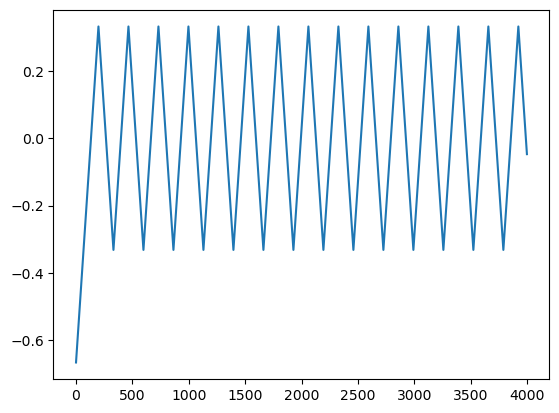

In [102]:
plt.plot(x_s)